In [33]:
import torch

# 데이터 타입
x=torch.IntTensor([1,2,3,4,5])
print(x)
print(x.shape)
print(x.size)
print(x.dtype)

# 디바이스
device='cuda'if torch.cuda.is_available() else 'cpu'
print(f'{device} mode')

x=torch.tensor([1,2,3,4,5])
print(x.numel())

x=torch.tensor([[1,2],[2,3],[4,5],[5,6]])
print(x.shape,x.size())

x=torch.LongTensor([1,2,3,4])
y=x.view(4,1)
print(y.size)
y


tensor([1, 2, 3, 4, 5], dtype=torch.int32)
torch.Size([5])
<built-in method size of Tensor object at 0x7f673cdcda80>
torch.int32
cuda mode
5
torch.Size([4, 2]) torch.Size([4, 2])
<built-in method size of Tensor object at 0x7f673cdcec50>


tensor([[1],
        [2],
        [3],
        [4]])

In [36]:
#model design
import torch
import torch.nn as nn

class model(nn.Module):
    def __init__(self):
        super(model,self).__init()
        self.l1=nn.Linear(786,512)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(512,256)
        self.relu=nn.ReLU()
        self.l3=nn.Linear(256,128)
        self.relu=nn.ReLU()
        self.l4=nn.Linear(128,64)
        self.relu=nn.ReLU()
        self.l5=nn.Linear(64,10)

    def forward(self,x):
        x=self.l1(x)
        x=self.relu(x)
        x=self.l2(x)
        x=self.relu(x)
        x=self.l3(x)
        x=self.relu(x)
        x=self.l4(x)
        x=self.relu(x)
        x=self.l5(x)
        return x

import torch
import torch.nn as nn
model=nn.Sequential(
        nn.Linear(786,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10))

nn.BatchNorm1d는 PyTorch 라이브러리의 하나의 정규화(normalization) 모듈입니다. 특히, 인공 신경망에서 배치 정규화(batch normalization)를 수행하는 데 사용됩니다. 배치 정규화는 입력 데이터를 평균과 표준편차로 정규화하여, 모델이 더 잘 수렴하도록 돕는 방법 중 하나입니다.

nn.BatchNorm1d는 1차원 입력에 대해서만 정규화를 수행하며, 생성자에서 num_features 인자를 받습니다. 이 인자는 입력 데이터의 채널 수를 나타냅니다. 예를 들어, nn.BatchNorm1d(num_features=10)은 10개의 채널을 가지는 입력 데이터에 대해서 배치 정규화를 수행하는 BatchNorm1d 모듈을 생성합니다.

num_features: 입력 데이터의 채널 수를 지정하는 인자입니다. 반드시 지정해야 합니다.
eps: 분모에 더해지는 작은 값으로, 0으로 나누는 것을 방지하기 위한 인자입니다. 기본값은 1e-05입니다.
momentum: 이전 배치의 평균과 분산값을 얼마나 반영할지를 지정하는 인자입니다. 기본값은 0.1입니다.
affine: 정규화된 값을 확대 및 이동시킬지 여부를 지정하는 인자입니다. 기본값은 True입니다.
track_running_stats: 배치 정규화의 효과를 추적할지 여부를 지정하는 인자입니다. 기본값은 True입니다.

torch.nn.BatchNorm1d(num_feature,epochs=0.001,momentum=0.1,
affine=True,track_runnig_stats=True)

torch.nn.BatchNorm2d(num_features,epochs=0.001,momentum=0.1,
affine=True,track_running_stats=True)

num_features: 입력 채널의 개수 (정수)
eps: 분모에 더해지는 작은 값 (스칼라), 기본값은 1e-05
momentum: 배치 정규화의 이동 평균 계산 시 사용되는 모멘텀 값 (스칼라), 기본값은 0.1
affine: 스케일과 시프트 매개변수를 학습할지 여부 (불리언), 기본값은 True
track_running_stats: 배치 정규화의 통계량을 추적할지 여부 (불리언), 기본값은 True

In [40]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm3d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [43]:
#1Dconv
import torch
import torch.nn as nn

# 입력 데이터의 크기: (배치 크기, 채널, 시퀀스 길이)
input_size = (16, 3, 100)

# 1차원 컨볼루션 레이어 정의
conv1d = nn.Conv1d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)

# 입력 데이터 생성
input_data = torch.randn(input_size)

# 컨볼루션 연산 수행
output = conv1d(input_data)

# 출력 데이터의 크기: (배치 크기, 출력 채널, 출력 시퀀스 길이)
print("Output size:", output.size())

Output_size: torch.Size([16, 16, 100])


Output size: torch.Size([16, 16, 100])


In [45]:
#2Dconv
import torch
import torch.nn as nn

# 입력 데이터의 크기: (배치 크기, 채널, 높이, 너비)
input_size = (64, 3, 32, 32)

# Conv2d 레이어 정의
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)

# 입력 데이터 생성
input_data = torch.randn(input_size)

# 컨볼루션 연산 수행
output = conv(input_data)

# 출력 데이터의 크기 출력
print("Output size:", output.size())

Output_size: torch.Size([64, 64, 32, 32])


Output size: torch.Size([64, 64, 32, 32])


# Adagrad
torch.optim.Adagrad는 Adagrad (Adaptive Gradient Descent) 옵티마이저의 구현체로, 파이토치에서 제공되는 옵티마이저 중 하나입니다. Adagrad는 학습률을 각 파라미터에 대해 독립적으로 조절하는 방식으로 모델을 업데이트하는 옵티마이저입니다. 이전 그래디언트의 제곱의 누적 값을 사용하여 학습률을 조절하므로, 그래디언트가 많이 업데이트된 파라미터는 학습률이 감소하게 되고, 그래디언트가 적게 업데이트된 파라미터는 학습률이 증가하게 됩니다. 이를 통해 데이터셋에 따라 학습률을 자동으로 조절하여 최적의 학습 성능을 얻을 수 있습니다.

torch.optim.Adagrad 함수의 기본 형태와 인수들의 기본값은 다음과 같습니다:

torch.optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)

params: 최적화할 파라미터들의 iterable
lr: 학습률(learning rate), 기본값은 0.01
lr_decay: 학습률 감소율, 기본값은 0
weight_decay: 가중치 감쇠(L2 정규화) 계수, 기본값은 0
initial_accumulator_value: 그래디언트 제곱의 누적 값 초기화, 기본값은 0
eps: 분모를 0으로 나누는 것을 방지하기 위한 작은 상수값, 기본값은 1e-10

# Adam
파이토치에서 제공하는 Adam은 Adam(Adaptive Moment Estimation) 현재 가장 널리 사용되는 옵티마이저로, 이전 그래디언트의 지수적인 이동 평균을 사용하여 학습률을 조절하는 방식으로 모델을 업데이트합니다. Adam은 경사 하강법(Gradient Descent) 알고리즘을 기반으로 하면서도, 모멘텀 및 학습률 감소와 같은 개선된 기능을 추가한 최적화 알고리즘입니다.

torch.optim.Adam 클래스를 사용하여 Adam 옵티마이저를 생성할 수 있습니다. 주요 인수들은 다음과 같습니다:

torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

params: 최적화할 모델의 파라미터들을 전달합니다.
lr: 학습률(learning rate)로, 기본값은 0.001입니다.
betas: Adam 알고리즘에서 사용되는 두 개의 모멘텀 계수(beta1, beta2)를 튜플 형태로 전달합니다. 기본값은 (0.9, 0.999)입니다.
eps: 분모를 보호하기 위한 작은 값(epsilon)으로, 기본값은 1e-08입니다.
weight_decay: 가중치 감소(L2 정규화)를 적용하는데 사용되는 가중치 감소 계수(weight decay coefficient)로, 기본값은 0입니다.
amsgrad: AMSGrad 알고리즘을 사용할지 여부를 결정하는 불리언 값으로, 기본값은 False입니다.

# AdamW
torch.optim.AdamW는 AdamW (Adam with Weight Decay) 옵티마이저의 구현체로, 파이토치에서 제공되는 옵티마이저 중 하나입니다. AdamW는 Adam 옵티마이저의 변형으로, 가중치 감쇠(weight decay)를 적용하는 것이 특징입니다. 가중치 감쇠는 모델의 가중치를 감소시킴으로써 모델의 복잡성을 제어하고, 오버피팅(overfitting)을 완화하는 효과가 있습니다.

torch.optim.AdamW 함수의 기본 형태와 인수들의 기본값은 다음과 같습니다:

torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

params: 최적화할 파라미터들의 iterable
lr: 학습률(learning rate), 기본값은 0.001
betas: 감마 값들 (beta1, beta2)로 이루어진 튜플, 기본값은 (0.9, 0.999)
eps: 분모를 0으로 나누는 것을 방지하기 위한 작은 상수값, 기본값은 1e-08
weight_decay: 가중치 감쇠(L2 정규화) 계수, 기본값은 0
amsgrad: AMSGrad 알고리즘을 사용할지 여부, 기본값은 False

# RMSprop
torch.optim.RMSprop은 파이토치에서 제공하는 최적화 알고리즘 중 하나로, Root Mean Square Propagation의 약자로 RMSprop이라고 불립니다. RMSprop은 딥 러닝에서 널리 사용되는 최적화 알고리즘 중 하나로, 주로 순환 신경망(RNN)과 같이 긴 시퀀스 데이터를 다룰 때 사용됩니다.

RMSprop은 경사(gradient)의 크기를 지수 이동 평균(exponential moving average)을 사용하여 조절하며, 경사의 크기에 따라 각각의 파라미터를 업데이트합니다. RMSprop은 이동 평균을 사용하여 경사의 크기를 조절하기 때문에, 이전 기울기의 크기와 현재 기울기의 크기를 비교하여 기울기의 크기가 크게 변하는 경우 더 작은 학습률을 적용하여 안정적인 학습을 할 수 있습니다.

일반적으로 사용되는 인수와 기본값은 다음과 같습니다:

torch.optim.RMSprop(params, lr=0.01, momentum=0, alpha=0.99, eps=1e-8, centered=False, weight_decay=0, momentum_decay=0)

params (iterable): 최적화할 파라미터들의 iterable. 일반적으로 모델의 model.parameters()를 전달합니다.
lr (float, optional, 기본값=0.01): 학습률(learning rate)로, 업데이트 스텝의 크기를 결정합니다. 높은 학습률은 빠른 학습을 가능하게 하지만, 수렴하지 않거나 발산할 수 있습니다.
momentum (float, optional, 기본값=0): 모멘텀(momentum)을 사용하여 업데이트에 관성을 부여합니다. 값이 0이면 모멘텀을 사용하지 않습니다.
alpha (float, optional, 기본값=0.99): RMSprop에서 이동 평균을 계산할 때 사용되는 계수로, 경사의 크기를 조절합니다. 1에 가까울수록 이동 평균이 빠르게 갱신되어 빠른 학습이 가능하지만, 불안정할 수 있습니다.
eps (float, optional, 기본값=1e-8): 분모를 0으로 나누는 것을 방지하기 위한 작은 상수입니다.
centered (bool, optional, 기본값=False): True로 설정하면, 중앙화된 RMSprop을 사용하여 업데이트됩니다.
weight_decay (float, optional, 기본값=0): 가중치 감쇠(weight decay)를 적용합니다. L2 정규화를 통해 가중치를 규제합니다.
momentum_decay (float, optional, 기본값=0): momentum decay를 적용합니다. 일반적으로 0.9 이하의 값으로 설정됩니다.
RMSprop의 주요 특징은 다음과 같습니다:

학습률 감쇠: RMSprop은 경사의 크기에 따라 학습률을 조절하여 안정적인 학습을 수행합니다. 경사의 크기가 크게 변하는 경우 더 작은 학습률을 사용하여 모델이 더 빠르게 수렴하도록 도와줍니다.

이동 평균 사용: RMSprop은 이전 기울기의 크기와 현재 기울기의 크기를 비교하여 경사의 크기를 조절합니다. 이를 통해 각각의 파라미터별로 적절한 학습률을 적용할 수 있습니다.

파라미터별 업데이트: RMSprop은 각각의 파라미터별로 학습률을 조절하여 업데이트합니다. 이를 통해 모델의 각 파라미터가 서로 다른 학습 속도로 업데이트되어 모델의 학습을 더욱 개선할 수 있습니다.

# SGD
torch.optim.SGD는 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 최적화 알고리즘을 구현한 PyTorch의 클래스입니다. SGD는 딥러닝 모델의 학습에서 가장 기본적으로 사용되는 최적화 알고리즘 중 하나로, 경사 하강법(Gradient Descent)의 확률적인 버전으로, 각 업데이트 스텝마다 무작위로 선택된 일부 샘플(mini-batch)에 대한 손실 함수의 그래디언트를 사용하여 모델을 업데이트합니다.

torch.optim.SGD의 인수들의 기본값은 다음과 같습니다:

torch.optim.SGD(params, lr=<required>, momentum=0, dampening=0, weight_decay=0, nesterov=False)

params: 최적화할 모델의 파라미터들을 전달합니다.
lr: 필수 인수로, 학습률(learning rate)입니다.
momentum: 모멘텀(momentum) 값으로, 기본값은 0입니다.
dampening: 모멘텀에 적용되는 감쇠(dampening) 값으로, 기본값은 0입니다.
weight_decay: 가중치 감소(L2 정규화)를 적용하는데 사용되는 가중치 감소 계수(weight decay coefficient)로, 기본값은 0입니다.
nesterov: 불리언 값으로, 네스테로프 모멘텀(Nesterov Momentum)을 사용할지 여부를 결정합니다. 기본값은 False입니다.
기본적으로 momentum과 dampening은 0으로 설정되어 있고, weight_decay와 nesterov는 비활성화 상태입니다. 사용자는 필요에 따라 이러한 기본값들을 조정하여 SGD 알고리즘의 동작을 커스터마이즈할 수 있습니다.

torch.optim.SGD 클래스는 다음과 같이 사용됩니다:

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

model.parameters(): 최적화할 모델의 파라미터들을 전달합니다. 이는 모델의 가중치와 편향들을 포함합니다.
lr: 학습률(learning rate)로, 가중치를 업데이트할 때 사용되는 스칼라 값입니다. 학습률은 모델이 얼마나 빠르게 수렴할지를 결정하는 하이퍼파라미터로, 너무 작으면 학습이 느리게 되고, 너무 크면 발산할 수 있습니다.
momentum (선택적): 모멘텀(momentum) 값을 설정합니다. 모멘텀은 SGD의 변형인 모멘텀 최적화(Momentum Optimization)에서 사용되는 하이퍼파라미터로, 이전 그래디언트의 가중 평균을 사용하여 현재 그래디언트를 업데이트하는 방법입니다. 기본값은 0이며, 값이 0보다 크면 모멘텀 최적화가 적용됩니다. 일반적으로 0.9와 같은 값이 사용됩니다.
torch.optim.SGD 클래스는 다양한 다른 매개변수들을 제공하며, 사용자는 필요에 따라 학습률 감소, 가중치 감소(L2 정규화), 네스테로프 모멘텀(Nesterov Momentum) 등을 설정할 수 있습니다.

torch.nn.MSELoss: 평균 제곱 오차(Mean Squared Error)를 계산하는 손실 함수로, 회귀(Regression) 문제에 사용됩니다.

torch.nn.L1Loss: 평균 절대 오차(Mean Absolute Error)를 계산하는 손실 함수로, 회귀 문제에 사용됩니다.

torch.nn.CrossEntropyLoss: 교차 엔트로피 손실(Cross Entropy Loss)를 계산하는 손실 함수로, 분류(Classification) 문제에 사용됩니다. 일반적으로 다중 클래스 분류에서 사용되며, 모델의 출력값과 타깃 클래스 간의 차이를 계산합니다.

torch.nn.BCELoss: 이진 교차 엔트로피 손실(Binary Cross Entropy Loss)를 계산하는 손실 함수로, 이진 분류(Binary Classification) 문제에 사용됩니다. torch.sigmoid 함수를 포함하여 활성화 함수를 적용하지 않은 로짓(logit) 값에 대해 교차 엔트로피 손실을 계산합니다. 이는 로짓 값이 아직 확률 값으로 변환되지 않은 상태에서 손실을 계산하므로, 안정적인 계산을 제공하고 수치적인 불안정성을 피할 수 있습니다.

torch.nn.BCEWithLogitsLoss: 이진 교차 엔트로피 손실(Binary Cross Entropy Loss)을 계산하는 손실 함수로, 시그모이드 함수를 적용하지 않은 모델의 출력값과 이진 타깃 간의 차이를 계산합니다. 시그모이드 함수를 적용하지 않기 때문에, 모델의 출력값을 로짓(logit) 형태로 입력받아 계산하는 특징이 있습니다.

torch.nn.NLLLoss: 음의 로그 우도(Negative Log Likelihood) 손실을 계산하는 손실 함수로, 분류 문제에 사용됩니다. 주로 로그 소프트맥스(log softmax) 출력을 사용하는 다중 클래스 분류에서 사용됩니다.

torch.nn.KLDivLoss: 쿨백-라이블러 발산(Kullback-Leibler Divergence)을 계산하는 손실 함수로, 두 개의 확률 분포를 입력으로 받아, 첫 번째 확률 분포가 두 번째 확률 분포와 얼마나 다른지를 측정하는 KL 발산 값을 계산합니다. 주로 생성 모델의 분포와 실제 데이터의 분포 간의 차이를 측정하는 등의 용도나 분포 간의 정규화를 위해 사용됩니다.


In [119]:
import torch
import torch.nn as nn
predict=torch.randn(10)
target=torch.randn(10)

mse=nn.MSELoss()  # 평균 제곱 오차(MSE) 손실
loss1=mse(predict,target)
print(loss1)

mae=nn.L1Loss()  # 평균 절대 오차(MAE) 손실
loss2=mae(predict,target)
print(loss2)

Xentropy=nn.CrossEntropyLoss() # 교차 엔트로피 손실
loss3=Xentropy(predict,target)
print(loss3)

byX=nn.BCELoss() # 이진 교차 엔트로피 손실
sigmoid=nn.Sigmoid()
SigPre=sigmoid(predict)
loss4=byX(SigPre,target.float())
print(loss4)
print(loss4.item())

byX=nn.BCEWithLogitsLoss() # 이진 교차 엔트로피 손실 (시그모이드 함수 적용하지 않음)
loss5=byX(predict,target.float())
print(loss5)
print(loss5)
print(loss5.item())


predict=torch.tensor([[0.5, 0.2, 0.3], [0.1, 0.6, 0.3], [0.2, 0.2, 0.6]])
target=torch.tensor([0,1,2])
import torch.nn.functional as F

nlh=nn.NLLLoss() # 음의 로그 우도(NLL) 손실
logsoft=nn.LogSoftmax(dim=1)
prelogsoft=logsoft(predict)
loss6=nlh(prelogsoft,target)
print(loss6)
print(loss6.item())

KLD=nn.KLDivLoss()# 쿨백-라이블러 발산(KLD) 손실
KDL=nn.KLDivLoss()#(reduction='batchmean')
log_soft=nn.Softmax(dim=1)
pred_log_soft=log_soft(predict) # 로그 소프트맥스 함수 적용
target_oen=F.one_hot(target,num_classes=predict.shape[1]).float()# 타깃값을 확률 분포형태로 변환
loss7=KLD(pred_log_soft,target_oen)
print(loss7)
print(loss7.item())


tensor(1.4253)
tensor(1.1049)
tensor(-5.9845)
tensor(0.2841)
0.28410404920578003
tensor(0.2841)
tensor(0.2841)
0.2841039001941681
tensor(0.8812)
0.8811807036399841
tensor(-0.1382)
-0.1382155418395996


# BCELoss
torch.nn.BCELoss는 PyTorch 라이브러리에서 제공하는 클래스로, 이진 분류(Binary Classification) 문제에서 사용되는 이진 교차 엔트로피(Binary Cross Entropy) 손실 함수를 구현한 것입니다. BCELoss는 예측값과 타겟값 사이의 교차 엔트로피를 계산하여 손실 값을 얻는데 사용됩니다.

torch.nn.BCELoss의 인수와 기본값은 다음과 같습니다:

torch.nn.BCELoss(weight=None, reduction='mean', pos_weight=None)
weight: 각 클래스에 대한 가중치를 지정하는 인수로, 기본값은 None입니다. 클래스 불균형이 있는 경우에 사용될 수 있습니다.
reduction: 손실 값을 어떻게 줄일지를 지정하는 인수로, 기본값은 'mean'입니다. 'sum','none' 옵션을 가지고 있습니다
pos_weight: 양성 클래스에 대한 가중치를 지정하는 인수로, 기본값은 None입니다. 양성 클래스의 중요도를 조절할 수 있습니다.
reduction 인수를 통해 손실 값을 어떻게 계산할지를 조절할 수 있습니다. 기본값인 'mean'은 교차 엔트로피 값을 평균으로 나누어 손실 값을 계산하는 것을 의미합니다. pos_weight 인수를 통해 양성 클래스에 대한 가중치를 지정할 수도 있습니다.

# CrossEntropyLoss
크로스 엔트로피 손실은 다중 클래스 분류(multi-class classification) 문제에서 주로 사용되며, 모델의 예측값과 실제 레이블 간의 차이를 계산하여 모델을 학습시키는 데 사용됩니다.

파이토치에서는 torch.nn.CrossEntropyLoss 클래스를 제공하여 크로스 엔트로피 손실을 계산할 수 있습니다. torch.nn.CrossEntropyLoss는 소프트맥스(softmax) 함수를 내장하고 있어, 모델의 출력값에 소프트맥스를 적용할 필요 없이 모델의 출력값과 레이블을 입력으로 받아 손실을 계산합니다. torch.nn.CrossEntropyLoss의 인수들은 다음과 같습니다:

torch.nn.CrossEntropyLoss(weight=None, ignore_index=-100, reduction='mean')

weight: 클래스별 가중치를 적용할 경우 사용하는 가중치 텐서, 기본값은 None
ignore_index: 무시할 클래스의 인덱스, 기본값은 -100
reduction: 손실을 감소(reduce)할 방법을 지정, 'mean'(평균), 'sum'(합), 'none'(감소하지 않음) 중 하나를 선택, 기본값은 'mean'
크로스 엔트로피 손실 이외에도 파이토치에서는 다양한 손실 함수들을 제공하고 있으며, 문제에 따라 적합한 손실 함수를 선택하여 모델을 학습시키는 것이 중요합니다.

# MSELoss
torch.nn.MSELoss는 PyTorch 라이브러리에서 제공하는 클래스로, 평균 제곱 오차(Mean Squared Error, MSE) 손실 함수를 구현한 것입니다. MSE는 예측값과 실제 타겟값의 차이의 제곱을 평균한 것으로, 회귀 문제에서 일반적으로 사용되는 손실 함수입니다.

torch.nn.MSELoss는 다음과 같은 인수와 기본값을 가지고 있습니다:

torch.nn.MSELoss(reduction='mean')

reduction: 손실 값을 어떻게 줄일지를 지정하는 인수로, 기본값은 'mean'입니다.
reduction 인수를 통해 손실 값을 어떻게 계산할지를 조절할 수 있습니다. 'sum', 'none'이 있고 기본값인 'mean'은 예측값과 타겟값의 차이의 평균을 손실 값으로 사용하는 것을 의미합니다.

# NLLLoss
torch.nn.NLLLoss는 PyTorch 라이브러리에서 제공하는 클래스로, Negative Log Likelihood(NLL) 손실 함수를 구현한 것입니다. NLL 손실 함수는 주로 다중 클래스 분류(multi-class classification) 문제에서 사용되며, 모델의 출력 확률 분포와 실제 타깃 레이블 사이의 차이를 측정하여 모델을 학습하는데 사용됩니다.

torch.nn.NLLLoss의 인수와 기본값은 다음과 같습니다:

torch.nn.NLLLoss(weight=None, ignore_index=-100, reduction='mean')

weight: 각 클래스에 대한 가중치를 지정하는 인수로, 클래스 불균형(class imbalance)을 처리할 때 사용될 수 있습니다. 기본값은 None으로, 모든 클래스에 대한 동일한 가중치를 사용합니다.
ignore_index: 손실 계산 시 무시할 레이블의 인덱스를 지정하는 인수로, 기본값은 -100입니다. 예를 들어, 패딩(padding)이 있는 시퀀스 데이터를 처리할 때, 패딩 토큰에 해당하는 레이블을 무시할 수 있습니다.
reduction: 손실 값을 어떻게 줄일지를 지정하는 인수로, 기본값은 'mean'입니다. 'sum', 'none' 옵션을 가지고 있습니다:
torch.nn.NLLLoss는 모델의 출력 확률 분포와 실제 타깃 레이블 사이의 차이를 측정하여 모델을 학습하는데 사용됩니다. 모델의 출력은 로그 확률(log probabilities)로 주어져야하며, 타깃 레이블은 정수값으로 주어져야 합니다. 모델이 출력하는 로그 확률 중 실제 타깃 레이블에 해당하는 값의 로그 확률을 사용하여 NLL 손실이 계산됩니다. NLL 손실은 실제 타깃 레이블에 해당하는 로그 확률의 음수값으로 정의되며, 모델의 예측이 실제 타깃 레이블과 일치할수록 손실 값이 낮아지게 됩니다. NLL 손실은 모델의 예측이 정확하게 타깃 레이블을 예측하는 데 중요한 역할을 합니다.

torch.nn.NLLLoss는 다양한 옵션을 제공하여 손실 값의 계산 방식을 조절할 수 있습니다. 가중치, 무시할 레이블, 손실 값의 평균 또는 합, 그리고 손실 값의 줄임 방식(reduction) 등을 설정하여 모델 학습에 적합한 손실 함수를 사용할 수 있습니다.

# model.parameters()
model.parameters()는 PyTorch 모델의 학습 가능한 파라미터들을 반환하는 메소드입니다. 이 메소드는 모델의 모든 학습 가능한 파라미터들을 Python의 generator 객체로 반환합니다. 이 generator 객체를 optim.Optimizer 클래스의 생성자에 전달하여, 해당 파라미터들이 최적화되도록 할 수 있습니다.

model.parameters() 메소드를 호출하면, 모델의 학습 가능한 파라미터들이 반환됩니다. 이 파라미터들은 모델의 모든 레이어 및 모듈에서 정의된 파라미터들을 포함하며, 모델이 학습 중에 업데이트되는 값들입니다. 이러한 학습 가능한 파라미터들은 모델이 데이터로부터 학습을 통해 최적의 가중치와 편향값을 찾아가는 과정에서 업데이트되는 값들입니다.

model.parameters()를 사용하여 반환된 파라미터들은 최적화 알고리즘 (예: SGD, Adam 등)을 통해 업데이트되는 대상이 되며, 학습 데이터와 손실 함수를 통해 계산된 그라디언트를 사용하여 업데이트됩니다. 이를 통해 모델이 학습 데이터에 맞게 가중치와 편향값을 조정하며, 모델의 예측 성능을 향상시키는 것이 가능합니다.

# model.train()
model.train()은 파이토치(PyTorch)에서 모델의 학습 모드를 설정하는 메소드입니다. 모델을 학습하기 위해 호출되는 함수로, 모델의 파라미터 업데이트 및 그래디언트(gradient) 계산을 가능하게 해줍니다.

model.train() 함수는 학습 모드로 설정하는데, 다음과 같은 동작들을 수행합니다:

드롭아웃(Dropout) 및 배치 정규화(Batch Normalization)와 같이 학습과정에서 사용되는 정규화(regularization) 기법들이 동작하도록 합니다. 이는 모델이 데이터에 대해 일반화(generalization)를 향상시키도록 도와줍니다.
그래디언트 계산을 가능하게 합니다. 학습 모드에서는 모델의 파라미터 업데이트를 위해 역전파(backpropagation)를 수행하고, 그래디언트를 계산합니다.
모델의 파라미터를 업데이트할 수 있도록 합니다. 학습 모드에서는 모델의 파라미터를 최적화(optimizer) 알고리즘에 따라 업데이트할 수 있습니다.
model.train() 함수는 보통 모델을 학습하기 전에 호출되며, 모델이 훈련 데이터에 대해 학습을 시작할 준비를 하는 데 사용됩니다. 예를 들어, 다음과 같이 사용할 수 있습니다:

In [120]:
import torch

# 모델 정의
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # 모델의 레이어들을 정의

    def forward(self, x):
        # 모델의 forward 연산을 정의
        pass

# 모델 인스턴스 생성
model = MyModel()

# 모델을 학습 모드로 설정
model.train()

# 모델을 사용하여 학습 데이터에 대해 forward 연산 및 역전파 수행
# 그래디언트 계산 및 파라미터 업데이트 수행



MyModel()

In [203]:
import torch
import torch.nn as nn
import torch.optim as opt
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 2)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return(x)

x=torch.randn(100,10)
y=torch.randint(0,2,(100,))  # 0,1사이의 값으로 100개 채우기

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape
y_train.shape
x_val.shape
y_val.shape

model=Model()
criter=nn.CrossEntropyLoss()
#criter=nn.BCELoss()
opt=opt.SGD(model.parameters(),lr=0.001)
#opt=opt.Adam(model.parameters(),lr=0.001)
num_epochs=1000
patient=3
best_val_loss=float('inf')  ## 양의 무한대 표현 -inf=>음의 무한대
no_improvement=0

lr_scheduler=ReduceLROnPlateau(opt,mode='min',factor=0.1,patience=2, verbose=True)


for epoch in range(num_epochs):
    print(epoch)
    model.train()
    opt.zero_grad()
    output=model(x_train)
    loss=criter(output,y_train)
    loss.backward()
    opt.step()

    model.eval()
    with torch.no_grad():
        val_output=model(x_val)
        val_loss=criter(val_output,y_val)
        val_loss=criter(val_output,y_val)


    if val_loss<best_val_loss:
        best_val_loss=val_loss
        no_improvement=0
        torch.save(model.state_dict(),'test_model_S.pth')
        print('complite')
    else:
        no_improvement+=1


    if no_improvement==patient:
        print(f'Early stopping after {epoch+1} epochs.')
        break
        
        
    lr_scheduler.step(val_loss)



load_model=Model()
load_model.load_state_dict(torch.load('test_model_S.pth'))
load_model.eval()#평가모드

# 추론 모드로 실행
with torch.inference_mode():
    # 추론 작업 수행
    print('=========')
    output = model(x_train)
    print(output)

x_test=torch.randn(10,10)
with torch.no_grad():
    output=load_model(x_test)
    _,predict=torch.max(output,1)
    predict=predict.numpy()
    print(predict)
    



0
complite
1
complite
2
complite
3
complite
Epoch 00004: reducing learning rate of group 0 to 1.0000e-04.
4
complite
5
complite
6
complite
Epoch 00007: reducing learning rate of group 0 to 1.0000e-05.
7
complite
8
9
Epoch 00010: reducing learning rate of group 0 to 1.0000e-06.
10
complite
11
12
Epoch 00013: reducing learning rate of group 0 to 1.0000e-07.
13
Early stopping after 14 epochs.
tensor([[ 0.3498, -0.1038],
        [ 0.3159, -0.2342],
        [ 0.3096, -0.1841],
        [ 0.3238, -0.1707],
        [ 0.4234, -0.2433],
        [ 0.3197, -0.2365],
        [ 0.2890, -0.2441],
        [ 0.4217, -0.3853],
        [ 0.2774, -0.1550],
        [ 0.3374, -0.0980],
        [ 0.2949, -0.1876],
        [ 0.4173,  0.0305],
        [ 0.3005, -0.1840],
        [ 0.3139, -0.1792],
        [ 0.2561, -0.1578],
        [ 0.3562, -0.2482],
        [ 0.3825, -0.1296],
        [ 0.2996, -0.1795],
        [ 0.3162, -0.2353],
        [ 0.3026, -0.1763],
        [ 0.3628, -0.2594],
        [ 0.3824, -

위 코드는 파이토치에서 Early Stopping, 모델 저장 및 로딩, ReduceLROnPlateau를 한 번에 구현한 예시입니다. 코드에 대한 간략한 설명은 다음과 같습니다.

MyModel: 가상의 모델 클래스로, 3개의 fully connected layer로 구성되어 있습니다.
데이터 생성 및 데이터셋 분리: 가상의 데이터를 생성하고, 학습 데이터와 검증 데이터로 분리합니다.
모델 초기화: MyModel 클래스의 인스턴스를 생성하고, 손실 함수와 최적화 알고리즘을 정의합니다.
Early stopping 관련 변수 초기화: Early stopping을 위한 변수들을 초기화합니다. 가장 낮은 검증 손실 값을 저장하고, 개선이 없는 epoch의 수를 세기 위한 변수들이 있습니다.
ReduceLROnPlateau 관련 변수 초기화: 학습률 조절을 위한 ReduceLROnPlateau 스케줄러를 초기화합니다.
모델 학습 루프: 지정한 epoch 수만큼 모델을 학습합니다. 학습 데이터로 forward, backward, optimizer step을 수행하고, 검증 데이터로 검증 손실을 계산합니다. 검증 손실이 이전 최적 손실보다 낮으면 모델을 저장하고, 개선이 없는 경우 Early stopping을 수행합니다. 또한, 검증 손실을 이용하여 학습률을 조절합니다.
저장된 모델 로딩: Early stopping 시점에서 저장한 최적 모델을 로딩합니다.
모델 추론: 로딩한 모델을 이용하여 테스트 데이터에 대한 예측을 수행합니다.


# with torch.inference_mode():
torch.inference_mode()는 PyTorch에서 제공하는 컨텍스트 매니저(context manager)로, 추론(inference) 과정에서 모델의 성능을 최적화하기 위해 사용되는 모드입니다. 이 모드를 사용하면 추론 시에는 학습(training) 시에 사용되는 일부 기능들을 비활성화하여 모델의 실행 속도와 효율성을 향상시킬 수 있습니다.

torch.inference_mode()는 별도의 인수를 받지 않습니다. with 문 안에 들어가는 것만으로 모델을 추론 모드로 전환합니다. with 문을 빠져나가면 모델은 다시 기존의 모드(학습 모드 또는 평가 모드)로 돌아갑니다.

torch.inference_mode()는 드롭아웃을 비활성화하고, 배치 정규화의 이동 평균과 이동 분산을 업데이트하지 않는 등의 추론 관련 동작을 수행합니다. 이를 통해 모델이 추론 시에는 학습 시와 다른 동작을 하도록 설정할 수 있습니다.

torch.inference_mode()를 사용하면 다음과 같은 효과를 얻을 수 있습니다:

Autograd 비활성화: 추론 시에는 모델의 그래디언트 계산이 필요하지 않기 때문에, autograd(자동 미분) 엔진을 비활성화하여 연산 속도를 향상시킬 수 있습니다.

메모리 최적화: 추론 시에는 중간 결과값을 유지할 필요가 없기 때문에, 중간 결과값을 메모리에 저장하지 않고 바로 해제하여 메모리 사용량을 줄일 수 있습니다.

장치 복사 최적화: 추론 시에는 모델의 입력과 출력을 복사하는 불필요한 연산을 제거하여 추론 속도를 향상시킬 수 있습니다.

import torch

#모델 정의 및 가중치 로드
model = MyModel()
model.load_state_dict(torch.load('test_model_S.pth'))

#추론 모드로 실행
with torch.inference_mode():
    # 추론 작업 수행
    output = model(input_tensor)

# ReduceLROnPlateau
ReduceLROnPlateau는 파이토치(PyTorch)의 학습률 감소 기법 중 하나로, 검증 손실(validation loss)이 더 이상 개선되지 않을 때 학습률을 동적으로 감소시켜 모델의 학습을 돕는 기법입니다.

ReduceLROnPlateau는 학습 중에 주기적으로 검증 데이터셋의 손실을 모니터링하고, 미리 정의된 조건에 따라 학습률을 감소시킵니다. 이를 통해 학습률을 조절하여 모델이 더 빠르게 수렴하도록 도와주며, 학습 과정에서의 안정성과 성능을 향상시킬 수 있습니다.

torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=1e-4, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-8, verbose=False)

optimizer: 옵티마이저(optimizer) 객체, 필수 인수입니다.

mode: 성능 개선을 어떻게 측정할지를 지정하는 문자열입니다. 기본값은 'min'으로, 검증 손실값이 감소할 때 성능이 개선되었다고 판단합니다. 다른 옵션으로는 'max' (검증 정확도가 증가할 때 성능 개선으로 간주)와 'auto' (자동으로 모드를 선택)가 있습니다.

factor: learning rate를 감소시킬 비율입니다. 기본값은 0.1로, 검증 손실값이 개선되지 않을 때 현재 learning rate에 0.1을 곱하여 감소시킵니다.

patience: 검증 손실값이 개선되지 않은 상태를 얼마나 허용할 것인지를 설정하는 정수값입니다. 기본값은 10으로, 10번의 연속적인 epoch 동안 검증 손실값이 개선되지 않으면 
learning rate를 감소시킵니다.

threshold: learning rate를 감소시키기 위한 기준 값입니다. threshold_mode에 따라 다르게 해석됩니다. 기본값은 1e-4로, 상대적인 변화율(rel)이 기준 값보다 작으면 
learning rate를 감소시킵니다.

threshold_mode: threshold의 해석 방법을 지정하는 문자열입니다. 'rel'은 상대적인 변화율로 해석하고, 'abs'는 절대적인 변화량으로 해석합니다. 기본값은 'rel'입니다.

cooldown: learning rate를 감소시키고 난 후, 새로운 learning rate를 적용하기 전에 몇 epoch 동안 학습을 일시 정지하는 횟수를 지정하는 정수값입니다. 기본값은 0으로, 일시 정지 없이 즉시 새로운 learning rate를 적용합니다.

min_lr: learning rate를 감소시킬 최소값을 지정하는 실수값입니다. 기본값은 0으로, learning rate가 이 값보다 작아지지 않도록 합니다.

eps: learning rate를 감소시킬 때, 최소값으로 설정할 수 있는 작은 값입니다. 기본값은 1e-8으로, learning rate가 이 값보다 작아지지 않도록 합니다.

verbose: True로 설정하면 감소된 learning rate에 대한 정보를 출력합니다. 기본값은 False로 출력되지 않도록 설정되어 있습니다.

In [208]:
import torch
import torch.optim as opt
from torch.optim.lr_scheduler import ReduceLROnPlateau

opt=opt.SGD(model.parameters(),lr=0.001)

scheduler=ReduceLROnPlateau(opt,mode='min',factor=0.1,patience=10,verbose=True)
for epoch in range(num_epochs):
    model.train()
    val_loss=validate()
    scheduler.step(val_loss)


import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 최적화할 모델과 옵티마이저 정의
model = ...
optimizer = ...

# ReduceLROnPlateau 스케줄러 초기화
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)

# 학습 루프
for epoch in range(max_epoch):
    # 학습 코드
    # ...

    # 검증 데이터셋을 사용하여 모델의 성능 평가
    val_loss = ...

    # ReduceLROnPlateau 스케줄러에 현재 검증 손실값 전달
    scheduler.step(val_loss)

    # 조기 종료 체크
    if scheduler.num_bad_epochs > scheduler.patience:
        print(f'Early stopping at epoch {epoch}...')
        break


NameError: name 'validate' is not defined

# num_bad_epochs
scheduler.num_bad_epochs는 PyTorch에서 학습률 스케줄러(Scheduler)를 사용할 때, 현재 학습률이 개선되지 않은(epoch의 손실이 향상되지 않은) 연속적인 epoch의 수를 나타내는 변수입니다. 이 변수는 주로 ReduceLROnPlateau 스케줄러와 함께 사용되며, 학습 중에 학습률을 동적으로 조절하는 데 사용됩니다.

ReduceLROnPlateau 스케줄러는 일정한 조건(예: 검증 손실의 개선이 멈춘 경우)을 만족할 때, 학습률을 조정하는 스케줄러입니다. 이 스케줄러는 optimizer.step()을 호출한 후에 호출되어야 하며, 학습률을 업데이트하기 위해 현재의 손실 값을 기준으로 조건을 평가합니다.

num_bad_epochs 변수는 연속적으로 손실이 개선되지 않은(epoch의 손실이 향상되지 않은) epoch의 수를 나타냅니다. 이 변수는 ReduceLROnPlateau 스케줄러에서 정의된 patience 인수와 관련이 있습니다. patience는 개선이 멈춘 후 추가적인 epoch 횟수를 지정하는데, num_bad_epochs가 patience보다 크거나 같아지면 학습률이 조정됩니다.

In [209]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Optimizer 초기화 및 모델과 연결
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# ReduceLROnPlateau 스케줄러 설정
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, verbose=True)

# 학습 중간에 손실 값을 사용하여 스케줄러 업데이트
for epoch in range(10):
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    val_loss = evaluate(model, val_loader, criterion)
    scheduler.step(val_loss)


NameError: name 'train_epoch' is not defined

torch: 딥러닝 프레임워크인 PyTorch 라이브러리를 사용하기 위해 import합니다.

numpy: 파이썬에서 수학 계산을 위한 라이브러리로서, 행렬 연산 등을 수행할 때 유용합니다.

pandas: 데이터 처리 및 분석을 위한 라이브러리로서, 데이터 프레임을 다룰 때 많이 사용합니다.

matplotlib.pyplot: 데이터 시각화를 위한 라이브러리입니다. 선 그래프, 산점도 등 다양한 그래프를 그릴 수 있습니다.

seaborn: matplotlib.pyplot 라이브러리를 기반으로 한 데이터 시각화 라이브러리입니다. 더 다양한 시각화 기능을 제공합니다.

glob: 디렉토리 내 파일들의 리스트를 뽑을 때 사용합니다.

IPython.display: IPython 커널에서 사용되는 display 함수를 제공합니다. 이미지, 오디오, 비디오 등을 표시할 때 유용합니다.

In [250]:
import pandas as ps
df=ps.DataFrame([1,2,_,34,4,5])
df

df1=ps.Series([[1,2],[3,_],[5,6],[7,8],[9,0]],index=['asd','dfg','ghj','jkl','cvb'])
df1
print(df1.values)
print(df1.index)

print('==============================================')

values = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
x = ['one', 'two', 'three']
y = ['A', 'B', 'C']

df = ps.DataFrame(values, index=x, columns=y)

print('데이터프레임 출력 :')
print('-'*18)
print(df)
print('='*50)

# 리스트로 생성하기
data = [
    ['1000', 'Steve', 90.72], 
    ['1001', 'James', 78.09], 
    ['1002', 'Doyeon', 98.43], 
    ['1003', 'Jane', 64.19], 
    ['1004', 'Pilwoong', 81.30],
    ['1005', 'Tony', 99.14],
]

df = ps.DataFrame(data)
print(df)
print(df.index)
df.describe() #모든 정보 확인
print(df.info())
print(df.columns)

[list([1, 2])
 list([3, tensor([0.3389, 0.3173, 0.3584, 0.3096, 0.4188, 0.2852, 0.3881, 0.3232, 0.3250,
         0.2848])])
 list([5, 6]) list([7, 8]) list([9, 0])]
Index(['asd', 'dfg', 'ghj', 'jkl', 'cvb'], dtype='object')
데이터프레임 출력 :
------------------
       A  B  C
one    1  2  3
two    4  5  6
three  7  8  9
      0         1      2
0  1000     Steve  90.72
1  1001     James  78.09
2  1002    Doyeon  98.43
3  1003      Jane  64.19
4  1004  Pilwoong  81.30
5  1005      Tony  99.14
RangeIndex(start=0, stop=6, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6 non-null      object 
 1   1       6 non-null      object 
 2   2       6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes
None
RangeIndex(start=0, stop=3, step=1)


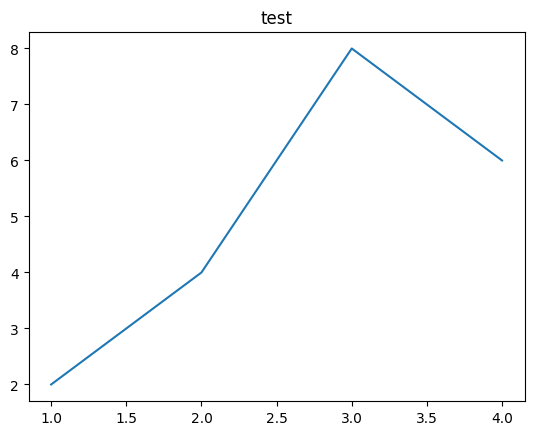

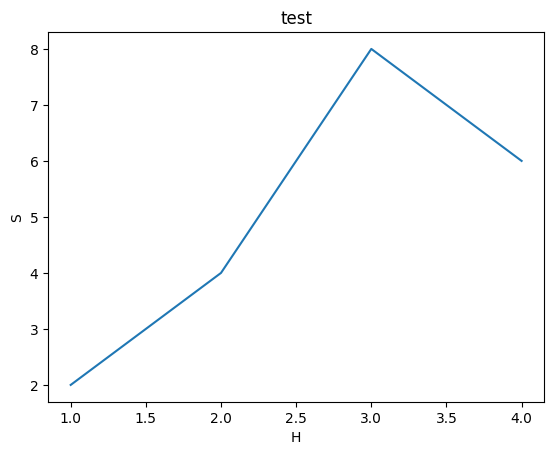

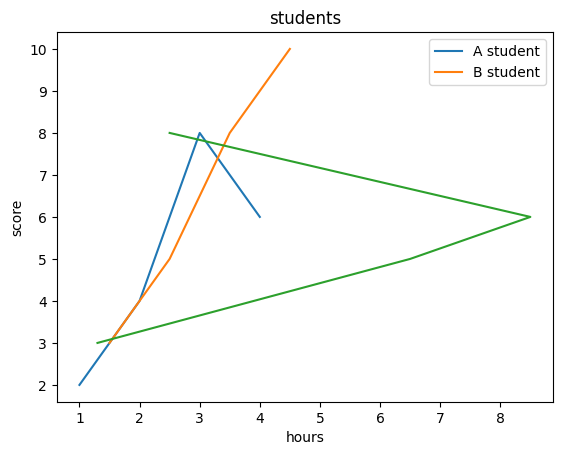

In [256]:
import matplotlib.pyplot as mp

mp.title('test')
mp.plot([1,2,3,4],[2,4,8,6])
mp.show()

#축 레이블 삽입하기
mp.title('test')
mp.xlabel('H')
mp.ylabel('S')
mp.plot([1,2,3,4],[2,4,8,6])
mp.show()

mp.title('students')
mp.plot([1,2,3,4],[2,4,8,6])
mp.plot([1.5,2.5,3.5,4.5],[3,5,8,10]) # 라인 새로 추가
mp.plot([1.3,6.5,8.5,2.5],[3,5,6,8])
mp.xlabel('hours')
mp.ylabel('score')
mp.legend(['A student', 'B student']) # 범례 삽입
mp.show()
